# A1C021017_DHELYA APRILIANI PUTRI_ANALISIS SISTEM MBKM
---

# Import Pustaka

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.metrics import RootMeanSquaredError
from tqdm.keras import TqdmCallback
from scipy import stats
from scipy.stats import skew

In [136]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [137]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [138]:
df.tail()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23
223,Lampung,2020,2604913.29,545149.05,2211.3,75.80,24.58


In [139]:
df.shape

(224, 7)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [141]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


a. Hasil panen di 8 provinsi selama 28 tahun mencapai rata-rata 1679700.887 ton, dengan jumlah paling rendah sebesar 42938 ton dan tertinggi mencapai 4881089 ton. Sementara itu, rata-rata luas lahan pertaniannya adalah 374.350 hektar

b. mean dan median dari setiap feature relatif sama menandakan data sudah berdistribusi normal


# DATA CLEANING

In [142]:
# cHECK MISSING VALUE
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [143]:
# CHECK DUPLICATED
df.duplicated().sum()

0

In [144]:
 df.isna().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [145]:
df.dtypes

Provinsi           object
Tahun               int64
Produksi          float64
Luas Panen        float64
Curah hujan       float64
Kelembapan        float64
Suhu rata-rata    float64
dtype: object

In [146]:
cek = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Data NaNN': df.isna().sum(),
    'Data Unique': df.nunique(),
    'Type Data': df.dtypes
})

cek

,Data Kosong,Data Duplikat,Data NaNN,Data Unique,Type Data
Provinsi,0,0,0,8,object
Tahun,0,0,0,28,int64
Produksi,0,0,0,224,float64
Luas Panen,0,0,0,224,float64
Curah hujan,0,0,0,220,float64
Kelembapan,0,0,0,180,float64
Suhu rata-rata,0,0,0,136,float64


Terdapat 8 data unik pada variabel 'Provinsi' dan 28 data unik pada variabel 'Tahun'. Hal ini mengindikasikan bahwa dataset ini mencakup jumlah produksi dari 8 provinsi tersebut selama rentang waktu 28 tahun.

In [147]:
df['Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung'], dtype=object)

In [148]:
df['Tahun'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

28 data unik dari variabel 'Tahun' merupakan rentang waktu dari tahun 1993 hingga 2020

# Exploratory Data Analysis
---

# Cek distribusi pada data target

In [149]:
df['Produksi'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Produksi,224.0,1.679701e+06,1.161387e+06,42938.0,548857.0,1667773.0,2436850.75,4881089.0


Text(0.5, 1.0, 'Cek Outlier')

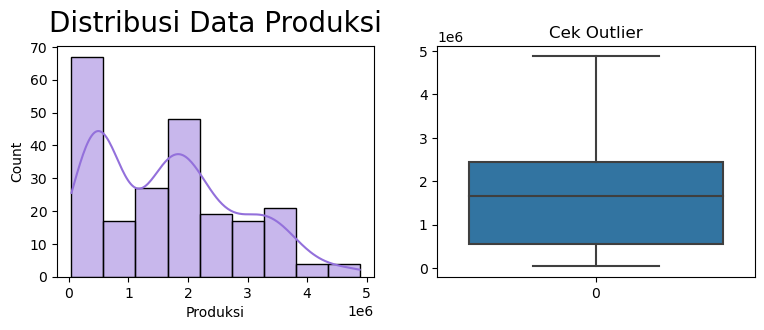

In [150]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.histplot(df['Produksi'], color = 'mediumpurple', kde = True)
plt.title('Distribusi Data Produksi', size = 20, pad = 10)
plt.subplot(1,2,2)
sns.boxplot(df['Produksi'])
plt.title('Cek Outlier')

data target berdistribusi normal

Text(0.5, 1.0, 'Transformasi Log Normal')

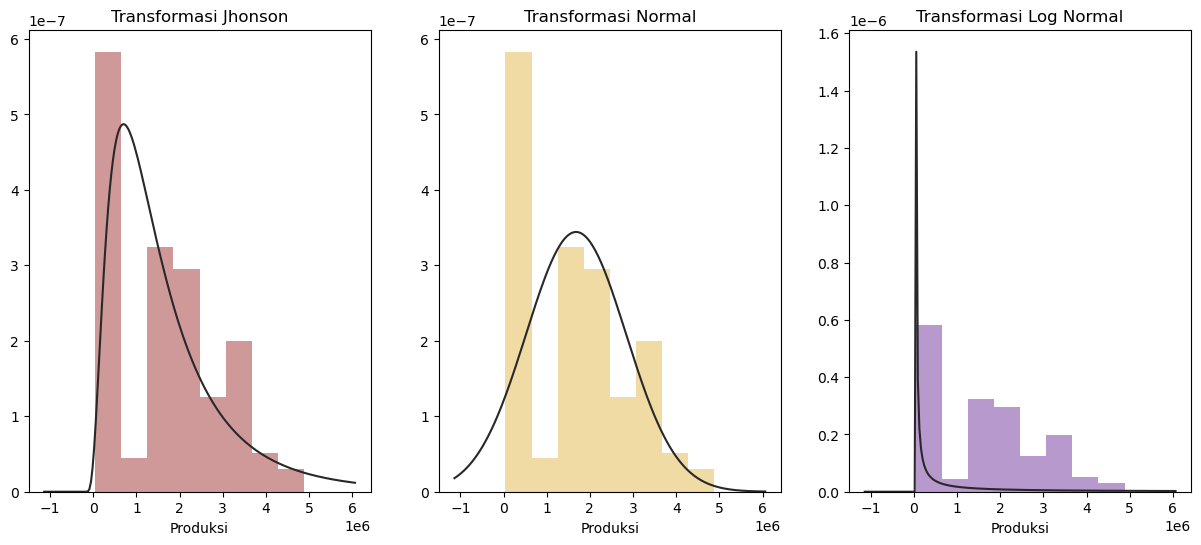

In [151]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(df['Produksi'],kde=False, fit=stats.johnsonsu,color="darkred")
plt.title("Transformasi Jhonson")
plt.subplot(1,3,2)
sns.distplot(df['Produksi'], kde = False, fit = stats.norm, color = 'goldenrod')
plt.title("Transformasi Normal")
plt.subplot(1,3,3)
sns.distplot(df['Produksi'], kde = False, fit = stats.lognorm, color = 'indigo')
plt.title("Transformasi Log Normal")

Transformasi dengan menggunakan metode normal menunjukkan distribusi yang cukup normal

# Cek distribusi pada data independen

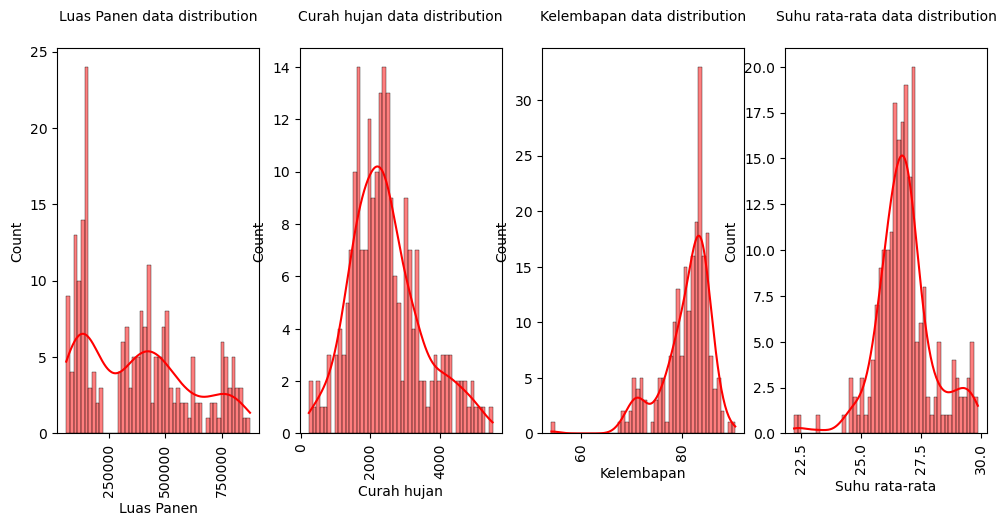

In [152]:
num_col = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
plt.figure(figsize=(12,5))
for i,col in enumerate(num_col):
  plt.subplot(1,4,i+1)
  sns.histplot(df[col], kde = True, color = 'red', bins = 50)
  plt.title(f"{col} data distribution", size = 10, pad = 20)
  plt.xticks(rotation = 90, size=10)
  plt.yticks(size=10)

1. Fitur semua variable sudah cukup berdistribusi normal
2. Fitur Kelembapan skewness negatif, bisa dilakukan transformasi

In [153]:
df[num_col].skew().sort_values().to_frame().rename(columns = {0:'Skew'})

,Skew
Kelembapan,-1.487425
Suhu rata-rata,0.061508
Luas Panen,0.428898
Curah hujan,0.631927


Text(0.5, 1.0, 'Transformasi Log Normal')

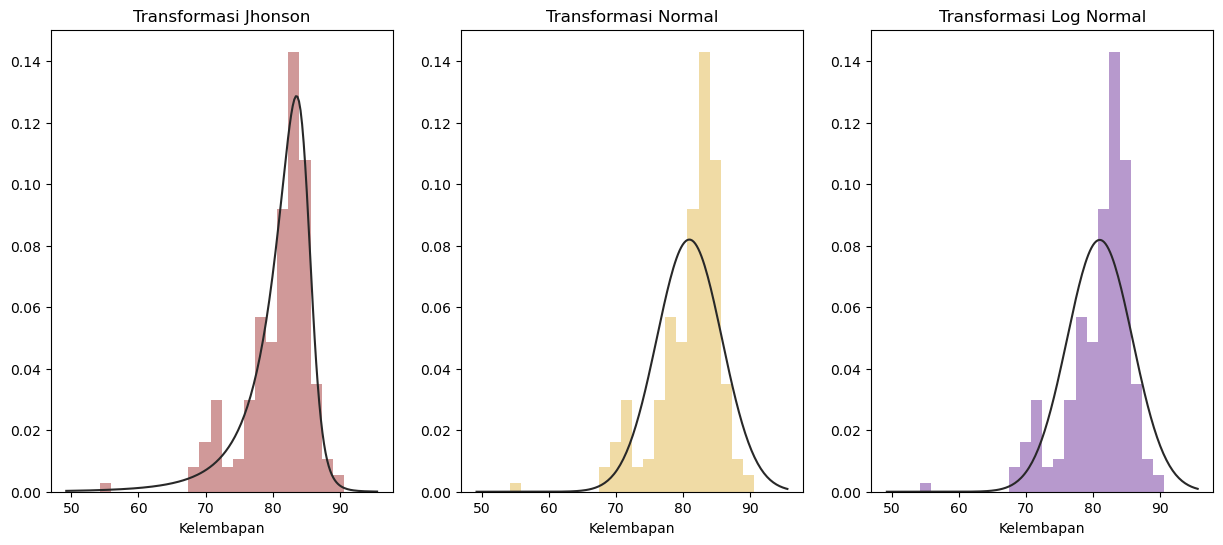

In [154]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(df['Kelembapan'],kde=False, fit=stats.johnsonsu,color="darkred")
plt.title("Transformasi Jhonson")
plt.subplot(1,3,2)
sns.distplot(df['Kelembapan'], kde = False, fit = stats.norm, color = 'goldenrod')
plt.title("Transformasi Normal")
plt.subplot(1,3,3)
sns.distplot(df['Kelembapan'], kde = False, fit = stats.lognorm, color = 'indigo')
plt.title("Transformasi Log Normal")

# Correlation matrix

<Axes: >

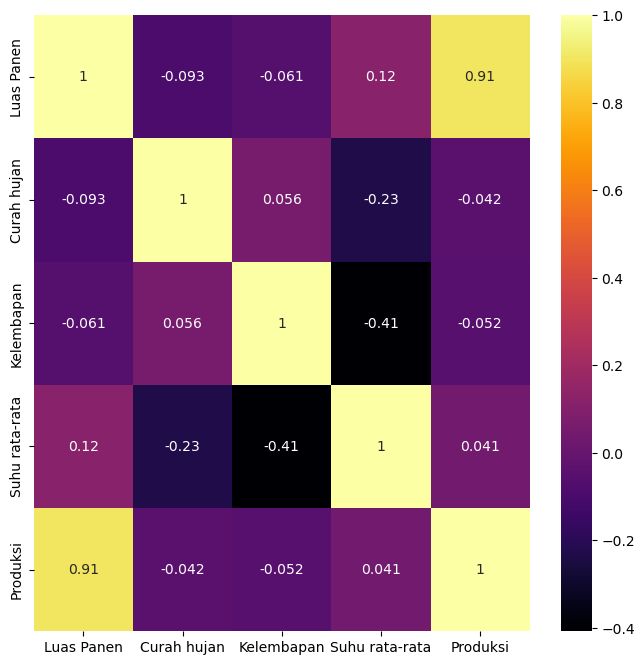

In [155]:
num_col = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
num_col.append('Produksi')
plt.figure(figsize=(8,8))
sns.heatmap(df[num_col].corr(), annot = True, cmap = 'inferno')

Dari matriks korelasi, kita dapat mengetahui hubungan antara variabel independen dan variabel output. Luas lahan pertanian dan suhu rata-rata memiliki korelasi positif, yang berarti bahwa ketika nilai luas lahan pertanian meningkat, produksi juga cenderung meningkat, meskipun pengaruh suhu tidak begitu signifikan. Di sisi lain, curah hujan dan kelembaban memiliki korelasi negatif, yang berarti bahwa ketika nilai kedua variabel ini menurun, produksi cenderung meningkat. Meskipun demikian, hubungan ini tidak begitu kuat, dan perubahan dalam grafik tidak terlalu signifikan.

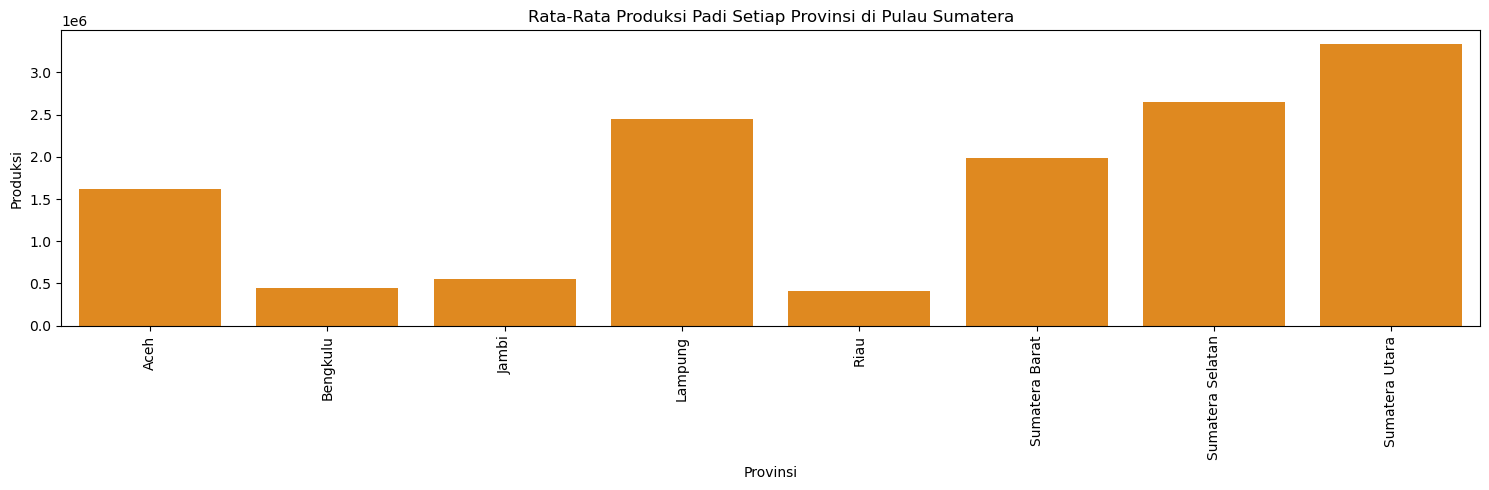

In [156]:
rata_per_provinsi = df.groupby('Provinsi')['Produksi'].mean().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = rata_per_provinsi.index, y = rata_per_provinsi['Produksi'], data = rata_per_provinsi, color = 'darkorange')
plt.title('Rata-Rata Produksi Padi Setiap Provinsi di Pulau Sumatera')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
     

Dari hasil visualisasi tersebut kita bisa melihat bahwa provinsi Sumatera Utara merupakan provinsi dengan produksi padi terbanyak dibandingkan dengan provinsi lainnya.

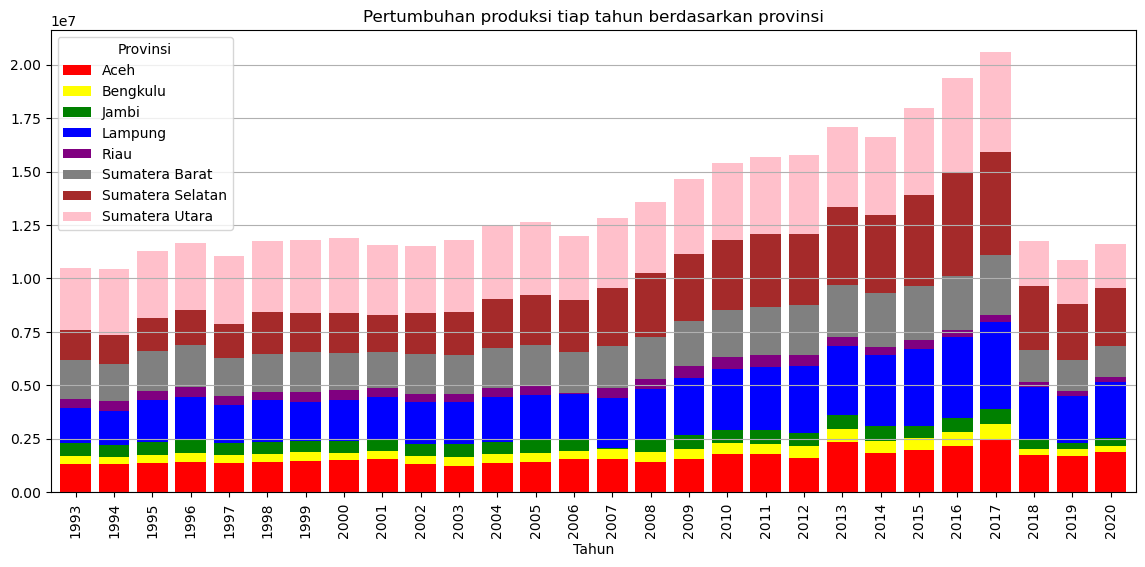

In [157]:
colors = ['red', 'yellow', 'green', 'blue', 'purple', 'grey', 'brown', 'pink']
df.pivot_table(index='Tahun', columns='Provinsi', values='Produksi').plot.bar(width=0.8, stacked=True, figsize=(14, 6), color=colors)
plt.title("Pertumbuhan produksi tiap tahun berdasarkan provinsi")
plt.grid(axis='y', which='major')
plt.show()

Produksi padi di Pulau Sumatera meningkat dari tahun 2003 yaitu sebanyak 11823024 ton hingga pada tahun 2017 mengalami peningkatan signifikan yang mencapai 20586773.50 ton, tetapi setelah itu mengalami pada tahun 2018 mengalami penurunan yang signifikan menjadi 11764423.68 ton. 

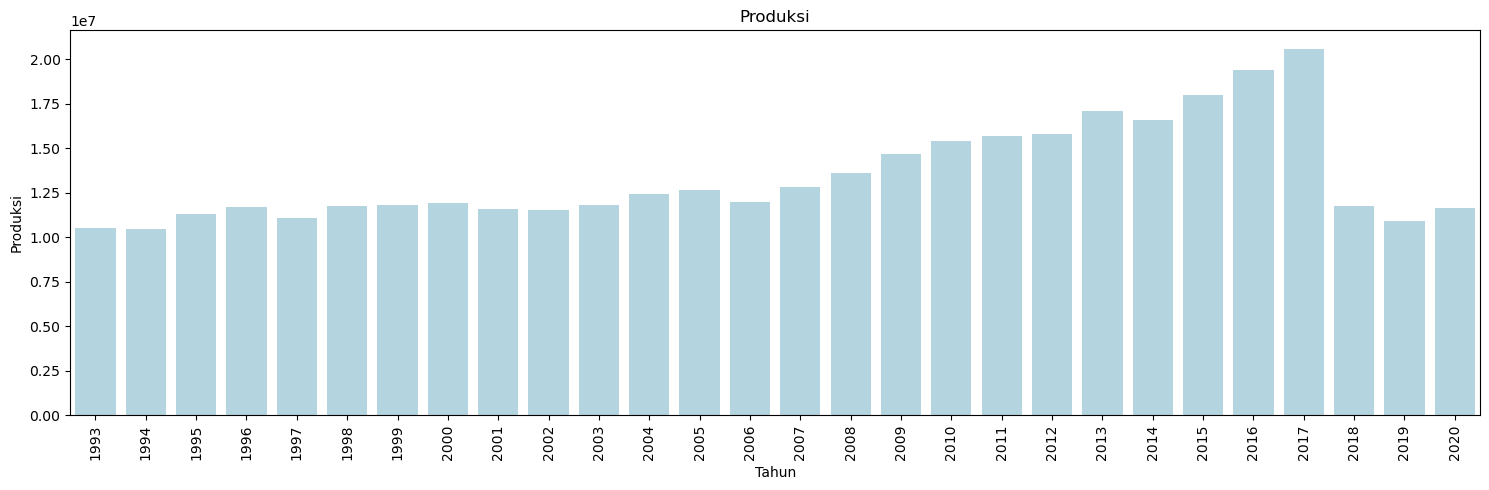

In [158]:
luas_panen = df.groupby('Tahun')['Produksi'].sum().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = luas_panen.index, y = luas_panen['Produksi'], data = luas_panen, color = 'lightblue')
plt.title('Produksi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [159]:
print('Produksi',df.groupby(['Tahun'], sort=False)['Produksi'].sum())

Produksi Tahun
1993    10511106.00
1994    10434879.00
1995    11277878.00
1996    11681931.00
1997    11069582.00
1998    11736390.00
1999    11816051.00
2000    11901379.00
2001    11571056.00
2002    11531731.00
2003    11823024.00
2004    12445839.00
2005    12655694.00
2006    12001280.00
2007    12841479.00
2008    13581940.00
2009    14652674.00
2010    15382976.00
2011    15670413.00
2012    15782225.00
2013    17093915.00
2014    16604009.00
2015    17956252.00
2016    19365875.90
2017    20586773.50
2018    11764423.68
2019    10881099.49
2020    11631123.08
Name: Produksi, dtype: float64


In [160]:

print('Luas Panen',df.groupby(['Tahun'], sort=False)['Luas Panen'].mean())

print('Curah hujan',df.groupby(['Tahun'], sort=False)['Curah hujan'].mean())

print('Kelembapan',df.groupby(['Tahun'], sort=False)['Kelembapan'].mean())

print('Suhu rata-rata',df.groupby(['Tahun'], sort=False)['Suhu rata-rata'].mean())


Luas Panen Tahun
1993    350114.25000
1994    348414.62500
1995    375457.25000
1996    383503.12500
1997    362133.37500
1998    395257.37500
1999    385883.25000
2000    381923.25000
2001    361182.75000
2002    368250.37500
2003    381278.62500
2004    394142.75000
2005    389560.00000
2006    370308.50000
2007    396491.75000
2008    392903.87500
2009    415300.75000
2010    421394.00000
2011    427794.00000
2012    434844.62500
2013    438442.25000
2014    431985.37500
2015    461121.25000
2016    274593.62500
2017    275097.00000
2018    295975.06375
2019    279416.22875
2020    289029.78125
Name: Luas Panen, dtype: float64
Curah hujan Tahun
1993    2906.31250
1994    2281.18750
1995    3140.31250
1996    2599.75000
1997    1583.52500
1998    2917.36250
1999    2727.60000
2000    2124.78750
2001    2614.06250
2002    2529.86250
2003    2911.46250
2004    2586.46250
2005    1547.21250
2006     847.92500
2007    2665.30000
2008    2442.86250
2009    2771.12500
2010    3205.28750
20

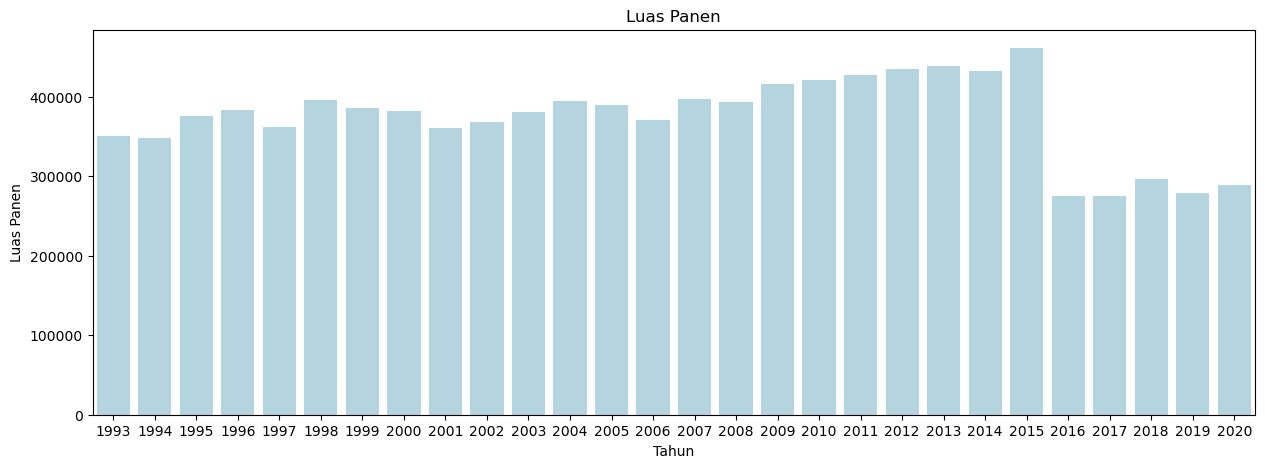

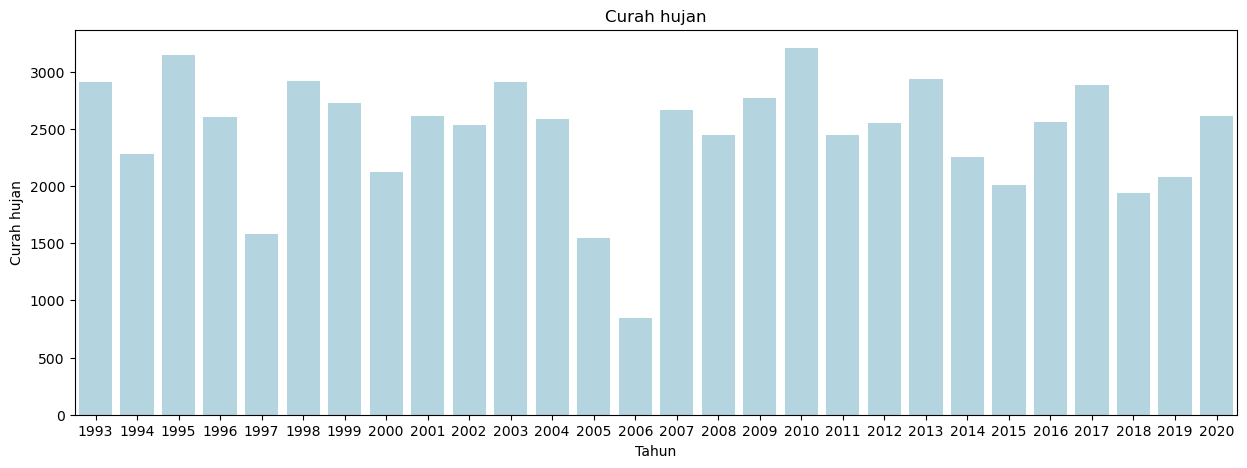

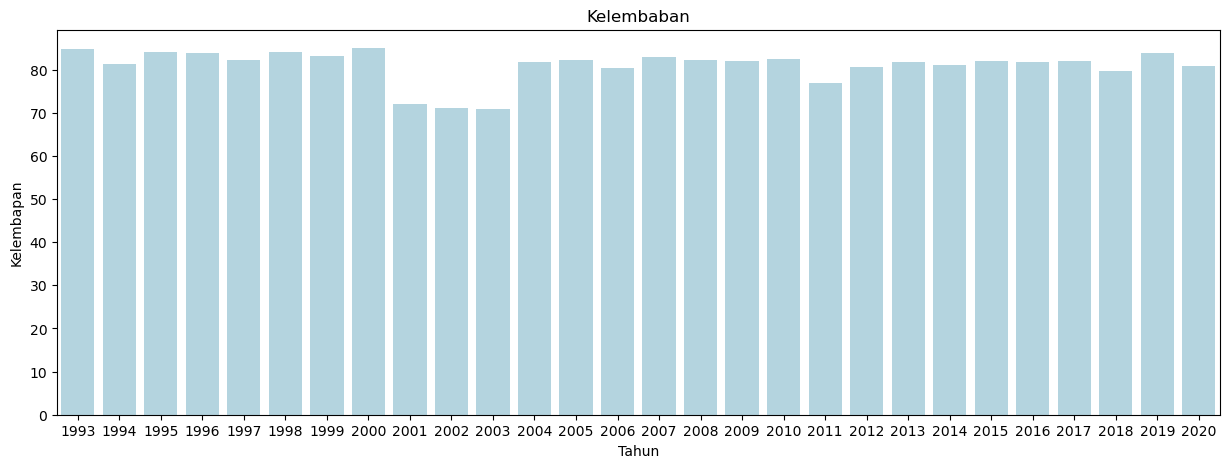

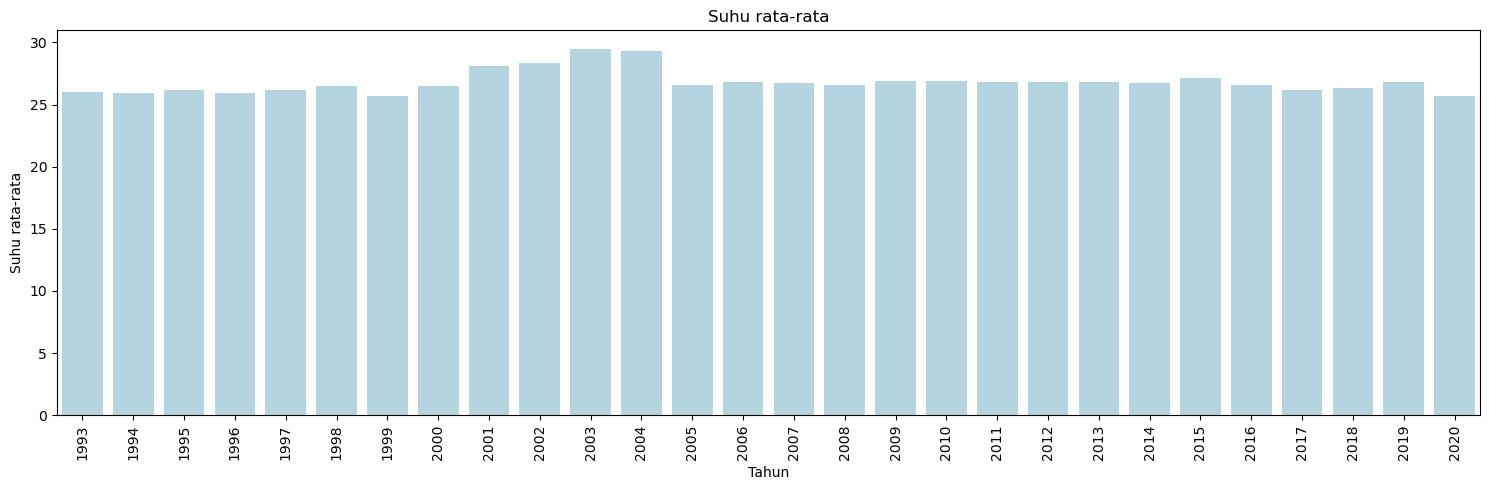

In [161]:
luas_panen = df.groupby('Tahun')['Luas Panen'].mean().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = luas_panen.index, y = luas_panen['Luas Panen'], data = luas_panen, color = 'lightblue')
plt.title('Luas Panen')

curah_hujan = df.groupby('Tahun')['Curah hujan'].mean().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = curah_hujan.index, y = curah_hujan['Curah hujan'], data = curah_hujan, color = 'lightblue')
plt.title('Curah hujan')

Kelembaban = df.groupby('Tahun')['Kelembapan'].mean().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = Kelembaban.index, y = Kelembaban['Kelembapan'], data = Kelembaban, color = 'lightblue')
plt.title('Kelembaban')

suhu_rata = df.groupby('Tahun')['Suhu rata-rata'].mean().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = suhu_rata.index, y = suhu_rata['Suhu rata-rata'], data = suhu_rata, color = 'lightblue')
plt.title('Suhu rata-rata')


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

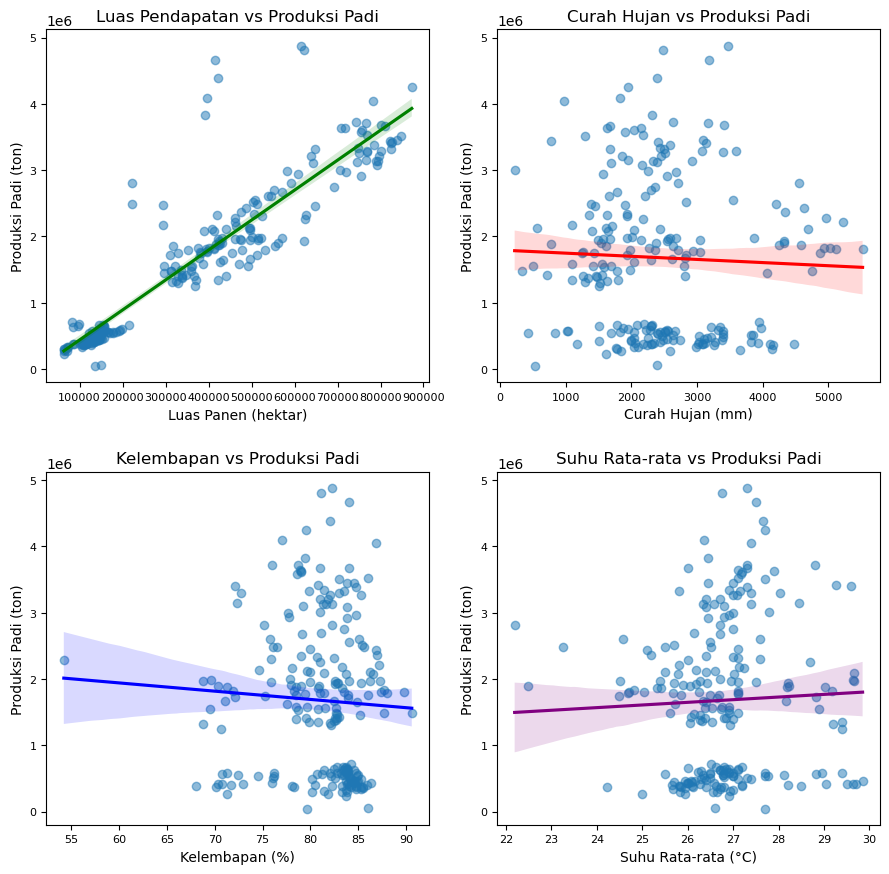

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Hubungan antara luas panen dan produksi padi
sns.regplot(ax=axes[0, 0], x=df['Luas Panen'], y=df['Produksi'], scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
axes[0, 0].set_title('Luas Pendapatan vs Produksi Padi')
axes[0, 0].set_xlabel('Luas Panen (hektar)')
axes[0, 0].set_ylabel('Produksi Padi (ton)')
axes[0, 0].tick_params(labelsize=8)

# Hubungan antara curah hujan dan produksi padi
sns.regplot(ax=axes[0, 1], x='Curah hujan', y='Produksi', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0, 1].set_title('Curah Hujan vs Produksi Padi')
axes[0, 1].set_xlabel('Curah Hujan (mm)')
axes[0, 1].set_ylabel('Produksi Padi (ton)')
axes[0, 1].tick_params(labelsize=8)

# Hubungan antara kelembapan dan produksi padi
sns.regplot(ax=axes[1, 0], x=df['Kelembapan'], y=df['Produksi'], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
axes[1, 0].set_title('Kelembapan vs Produksi Padi')
axes[1, 0].set_xlabel('Kelembapan (%)')
axes[1, 0].set_ylabel('Produksi Padi (ton)')
axes[1, 0].tick_params(labelsize=8)

# Hubungan antara suhu rata-rata dan produksi padi
sns.regplot(ax=axes[1, 1], x=df['Suhu rata-rata'], y=df['Produksi'], scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})
axes[1, 1].set_title('Suhu Rata-rata vs Produksi Padi')
axes[1, 1].set_xlabel('Suhu Rata-rata (°C)')
axes[1, 1].set_ylabel('Produksi Padi (ton)')
axes[1, 1].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

Gabungan visualisasi tersebut kini mencakup hubungan antara curah hujan dan produksi padi serta faktor-faktor yang telah dibahas sebelumnya:

1. Luas Panen dan Produksi Padi: Korelasi positif antara luas panen dan produksi menunjukkan bahwa peningkatan luas tanam padi dapat meningkatkan produksi secara keseluruhan.
2. Curah Hujan dan Produksi Beras: Penambahan plot hubungan curah hujan memperkuat korelasi positif antara curah hujan dan produksi beras, yang menunjukkan bahwa pasokan air yang cukup dari curah hujan bermanfaat bagi hasil panen padi.
3. Kelembapan dan Produksi Beras: Keberagaman dalam hubungan antara kelembapan dan produksi menunjukkan bahwa kelembapan saja bukan merupakan prediktor yang kuat terhadap tingkat produksi, kemungkinan besar disebabkan oleh kemampuan adaptasi beras terhadap tingkat kelembapan yang berbeda.
4. Suhu Rata-rata dan Produksi Beras: Hubungan antara suhu dan produksi nampaknya lemah, hal ini menunjukkan bahwa dalam kisaran suhu yang diamati, produksi beras tidak terlalu sensitif terhadap variasi suhu di Sumatera.

Secara keseluruhan, visualisasi ini memberikan gambaran komprehensif tentang bagaimana berbagai faktor lingkungan berkorelasi dengan produksi padi di Sumatera. Curah hujan yang cukup dan lahan pertanian yang cukup tampaknya menjadi faktor kunci dalam memaksimalkan hasil panen padi, sementara kelembapan dan suhu dalam kisaran normal di wilayah tersebut mempunyai pengaruh yang kurang jelas. Wawasan ini dapat menjadi masukan bagi kebijakan pertanian yang berfokus pada pengelolaan air, penggunaan lahan, dan strategi adaptasi iklim.

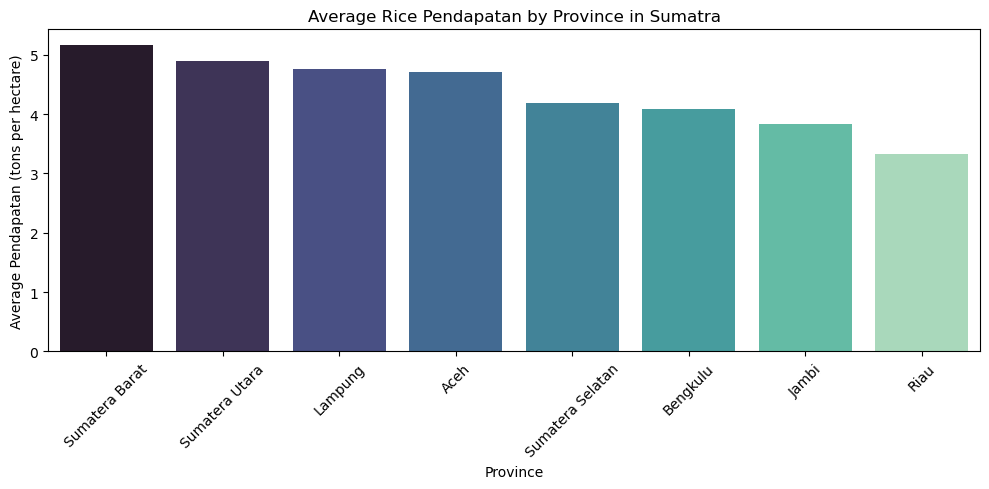

In [163]:
df['Pendapatan'] = df['Produksi'] / df['Luas Panen'] #Count Pendapatan

plt.figure(figsize=(10, 5))
average_Pendapatan_by_province = df.groupby('Provinsi')['Pendapatan'].mean().sort_values(ascending=False)
sns.barplot(x=average_Pendapatan_by_province.index, y=average_Pendapatan_by_province.values, palette="mako")
plt.title('Average Rice Pendapatan by Province in Sumatra')
plt.xlabel('Province')
plt.ylabel('Average Pendapatan (tons per hectare)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Annalisis Forecasting

# Preprocessing

In [164]:
#Data preprossesing dengan SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']] = imputer.fit_transform(
    df[['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
)

In [165]:
#Normalisasi data menggunakan metode Min-Max Scaling. 
# Import library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Mengabaikan kolom 'Provinsi' dan 'Tahun' untuk normalisasi
numeric_data = df.drop(['Provinsi', 'Tahun'], axis=1)

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Membuat DataFrame baru dengan data yang sudah dinormalisasi
normalized_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Menampilkan lima baris pertama data yang sudah dinormalisasi
print(normalized_data.head())

   Produksi  Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata  Pendapatan
0  0.265928    0.321700     0.265025    0.763736        0.505222    0.307331
1  0.259761    0.328435     0.245023    0.767033        0.617493    0.294469
2  0.276958    0.341048     0.236532    0.783516        0.532637    0.304707
3  0.284445    0.352128     0.251816    0.791209        0.507833    0.304627
4  0.273893    0.338958     0.210680    0.776374        0.537859    0.302802


# Model

In [166]:
#  Model 1 : Regresi linear
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Mengabaikan kolom 'Provinsi' dan 'Tahun' untuk normalisasi
numeric_data = df.drop(['Provinsi', 'Tahun'], axis=1)

# Normalisasi menggunakan Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Membuat DataFrame baru dengan data yang sudah dinormalisasi
normalized_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Memilih fitur (variabel independen) dan target (variabel dependen)
X = normalized_data.drop('Produksi', axis=1)
y = normalized_data['Produksi']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Menampilkan koefisien dan intercept
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.002764954436318183
R-squared: 0.9267965690245893
Koefisien: [0.71226945 0.0075778  0.03481325 0.03939377 0.84389791]
Intercept: -0.2640904082047343


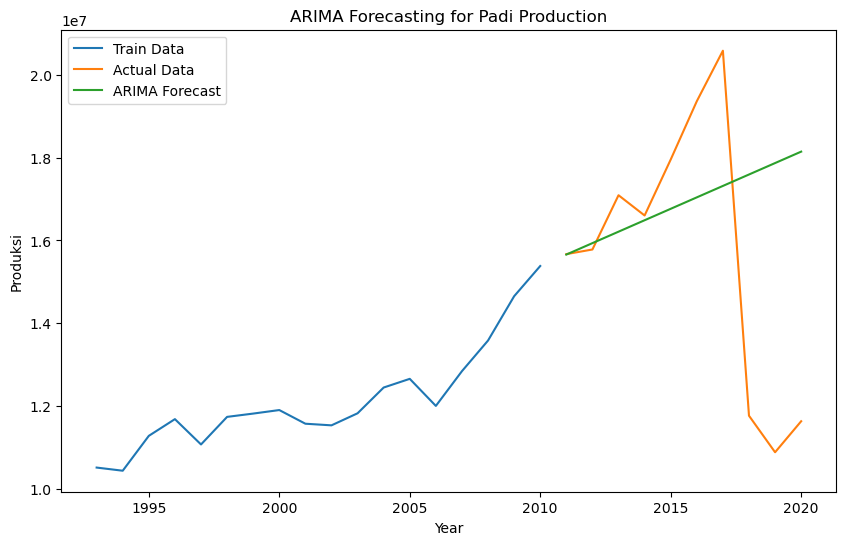

Mean Squared Error (MSE): 14363825817298.625


In [167]:
#  Model 1 : ARIMA Forecast
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mengabaikan kolom 'Provinsi' dan 'Tahun' untuk forecasting
time_series_data = df.groupby('Tahun')['Produksi'].sum().reset_index()

# Split data menjadi train dan test
train_data = time_series_data[:-10]  # Contoh: menggunakan 10 tahun terakhir sebagai test
test_data = time_series_data[-10:]

# Membangun model ARIMA
p, d, q = 1, 1, 1  # Sesuaikan dengan parameter terbaik berdasarkan analisis atau tuning model
arima_model = ARIMA(train_data['Produksi'], order=(p, d, q))
arima_result = arima_model.fit()

# Melakukan forecasting untuk data test
forecast_values = arima_result.get_forecast(steps=len(test_data))
forecast_mean = forecast_values.predicted_mean

# Menampilkan hasil forecasting
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tahun'], train_data['Produksi'], label='Train Data')
plt.plot(test_data['Tahun'], test_data['Produksi'], label='Actual Data')
plt.plot(test_data['Tahun'], forecast_mean, label='ARIMA Forecast')
plt.title('ARIMA Forecasting for Padi Production')
plt.xlabel('Year')
plt.ylabel('Produksi')
plt.legend()
plt.show()

# Mengukur performa model menggunakan MSE (Mean Squared Error)
mse = mean_squared_error(test_data['Produksi'], forecast_mean)
print(f'Mean Squared Error (MSE): {mse}')

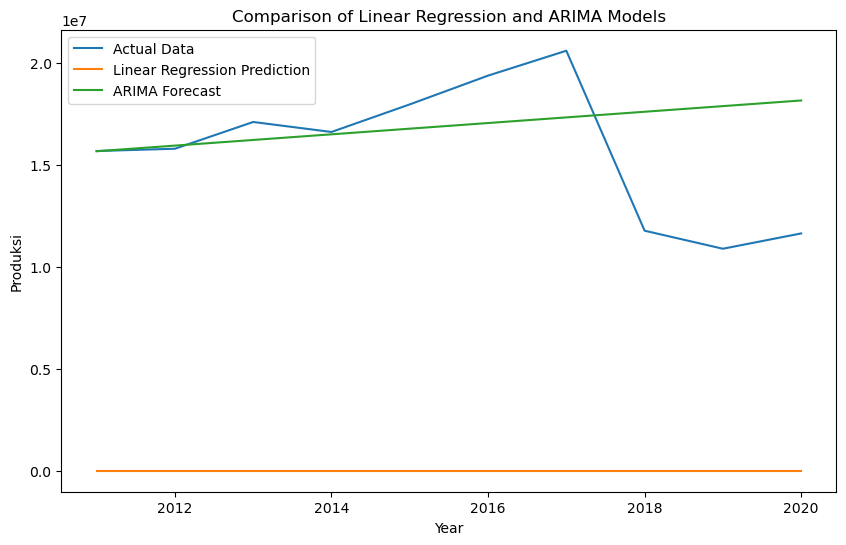

Linear Regression Model:
Mean Squared Error: 0.002764954436318183
R-squared: 0.9267965690245893

ARIMA Model:
Mean Squared Error (MSE): 14363825817298.625


In [168]:
#Visualisasi hasil ke 2 model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

#Model Regresi Linear
numeric_data = df.drop(['Provinsi', 'Tahun'], axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)
normalized_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)
X = normalized_data.drop('Produksi', axis=1)
y = normalized_data['Produksi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Model ARIMA
time_series_data = df.groupby('Tahun')['Produksi'].sum().reset_index()
train_data = time_series_data[:-10]
test_data = time_series_data[-10:]
p, d, q = 1, 1, 1
arima_model = ARIMA(train_data['Produksi'], order=(p, d, q))
arima_result = arima_model.fit()

# Melakukan forecasting untuk data test
forecast_values = arima_result.get_forecast(steps=len(test_data))
forecast_mean_arima = forecast_values.predicted_mean
mse_arima = mean_squared_error(test_data['Produksi'], forecast_mean_arima)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(test_data['Tahun'], test_data['Produksi'], label='Actual Data')
plt.plot(test_data['Tahun'], y_pred_linear[:len(test_data)], label='Linear Regression Prediction')
plt.plot(test_data['Tahun'], forecast_mean_arima, label='ARIMA Forecast')
plt.title('Comparison of Linear Regression and ARIMA Models')
plt.xlabel('Year')
plt.ylabel('Produksi')
plt.legend()
plt.show()

# Menampilkan hasil evaluasi
print('Linear Regression Model:')
print(f'Mean Squared Error: {mse_linear}')
print(f'R-squared: {r2_linear}')

print('\nARIMA Model:')
print(f'Mean Squared Error (MSE): {mse_arima}')


Linear Regression Model:

Mean Squared Error (MSE): MSE untuk model regresi linear adalah 0.00276. MSE mengukur seberapa dekat prediksi model dengan nilai aktual.
Semakin rendah MSE, semakin baik modelnya. Dalam konteks ini, MSE yang rendah menunjukkan bahwa model regresi linear secara relatif baik
dalam memprediksi produksi padi.

ARIMA Model:

Mean Squared Error (MSE): MSE untuk model ARIMA adalah 14,360,487,067,739.84. Nilai MSE yang sangat tinggi ini menunjukkan bahwa model 
ARIMA tidak cukup baik dalam memprediksi produksi padi berdasarkan data uji yang digunakan. 
MSE yang tinggi menandakan bahwa terdapat ketidakcocokan yang signifikan antara nilai aktual dan nilai prediksi.